In [161]:
%pip install seaborn

In [162]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import colormaps
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')


In [163]:
# Reading CSV

In [164]:
df = pd.read_csv('best-selling-books.csv')

In [165]:
df.head(10)

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0,Novella
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,Fantasy
3,And Then There Were None,Agatha Christie,English,1939,100.0,Mystery
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0,Family saga
5,The Hobbit,J. R. R. Tolkien,English,1937,100.0,Fantasy
6,"The Lion, the Witch and the Wardrobe",C. S. Lewis,English,1950,85.0,"Fantasy, Children's fiction"
7,She: A History of Adventure,H. Rider Haggard,English,1887,83.0,Adventure
8,Vardi Wala Gunda (वर्दी वाला गुंडा),Ved Prakash Sharma,Hindi,1992,80.0,Detective
9,The Da Vinci Code,Dan Brown,English,2003,80.0,Mystery thriller


In [166]:
df.tail(10)

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
164,The Joy of Sex,Alex Comfort,English,1972,10.0,NaN
165,The Gospel According to Peanuts,Robert L. Short,English,1965,10.0,NaN
166,The Subtle Art of Not Giving a Fuck,Mark Manson,English,2016,10.0,NaN
167,Life of Pi,Yann Martel,English,2001,10.0,NaN
168,The Front Runner,Patricia Nell Warren,English,1974,10.0,NaN
169,The Goal,Eliyahu M. Goldratt,English,1984,10.0,NaN
170,Fahrenheit 451,Ray Bradbury,English,1953,10.0,NaN
171,Angela's Ashes,Frank McCourt,English,1996,10.0,NaN
172,The Story of My Experiments with Truth (સત્યના...,Mohandas Karamchand Gandhi,Gujarati,1929,10.0,NaN
173,Bridget Jones's Diary,Helen Fielding,English,1996,10.0,NaN


In [167]:
df.shape

(174, 6)

In [168]:
df.describe()

,First published,Approximate sales in millions
count,174.000000,174.000000
mean,1962.522989,30.097126
std,64.268737,27.957985
min,1304.000000,10.000000
25%,1947.000000,14.000000
50%,1974.000000,20.000000
75%,1995.000000,36.300000
max,2018.000000,200.000000


In [169]:
df.info()
# We can see that some of the genres have been filled with null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Book                           174 non-null    object 
 1   Author(s)                      174 non-null    object 
 2   Original language              174 non-null    object 
 3   First published                174 non-null    int64  
 4   Approximate sales in millions  174 non-null    float64
 5   Genre                          118 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.5+ KB


In [170]:
df.dtypes

Book                              object
Author(s)                         object
Original language                 object
First published                    int64
Approximate sales in millions    float64
Genre                             object
dtype: object

In [171]:
sales_stats = df['Approximate sales in millions'].describe()
print("Summary Statistics for Sales:\n", sales_stats)

Summary Statistics for Sales:
 count    174.000000
mean      30.097126
std       27.957985
min       10.000000
25%       14.000000
50%       20.000000
75%       36.300000
max      200.000000
Name: Approximate sales in millions, dtype: float64


In [172]:
# Top-Rated Books

In [173]:
top_selling_books = df.sort_values('Approximate sales in millions', ascending=False).head(5)
print("Top Selling Books:")
display(top_selling_books)

Top Selling Books:


,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0,Novella
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,Fantasy
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0,Family saga
5,The Hobbit,J. R. R. Tolkien,English,1937,100.0,Fantasy


In [174]:
# Data Visualization

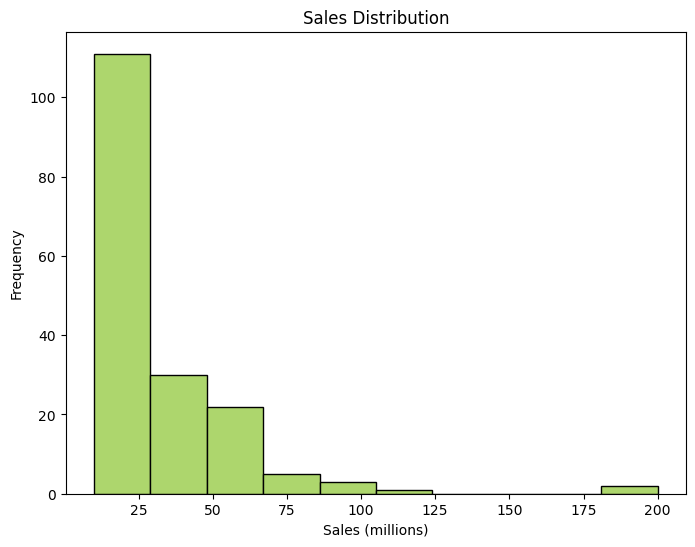

In [175]:
plt.figure(figsize=(8, 6))
plt.hist(df['Approximate sales in millions'], bins=10, edgecolor='black', color='#ADD66D')
plt.xlabel('Sales (millions)')
plt.ylabel('Frequency')
plt.title('Sales Distribution')
plt.show()

In [176]:
# Top 10 Sales By Genre

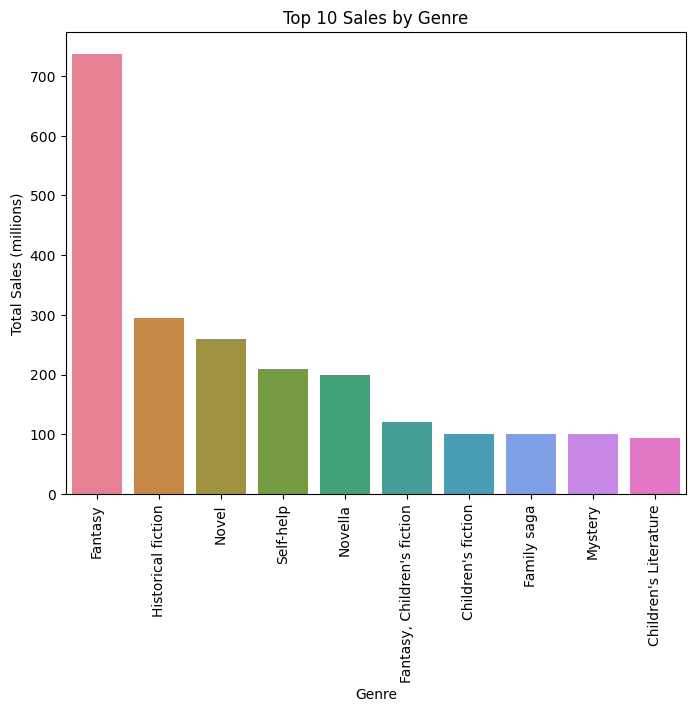

In [177]:
sales_by_genre = df.groupby('Genre')['Approximate sales in millions'].sum().reset_index()

top_10_genres = sales_by_genre.nlargest(10, 'Approximate sales in millions')

distinct_colors = sns.color_palette('husl', n_colors=len(top_10_genres))

plt.figure(figsize=(8, 6))
sns.barplot(data=top_10_genres, palette=distinct_colors, x='Genre', y='Approximate sales in millions')
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')
plt.title('Top 10 Sales by Genre')
plt.xticks(rotation=90)
plt.show()

In [178]:
# Total Sales By Language of Origin

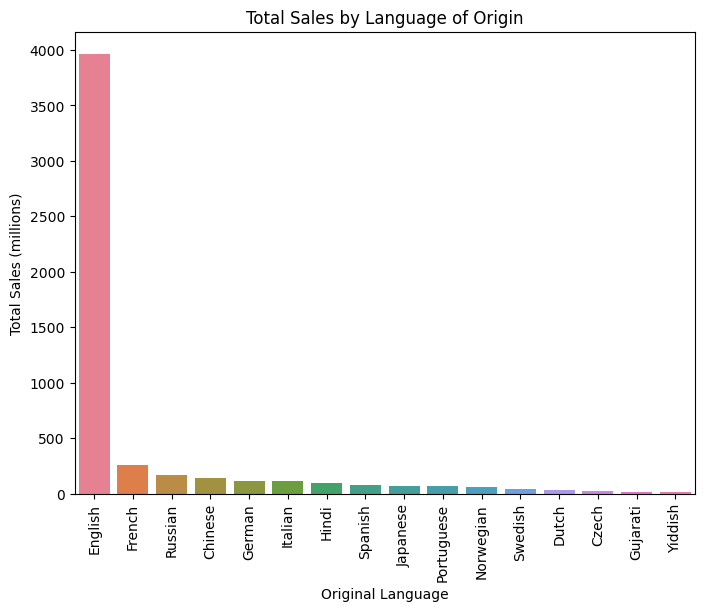

In [179]:
sales_by_language = sales_by_language.sort_values(by='Approximate sales in millions', ascending=False)

distinct_colors = sns.color_palette('husl', n_colors=len(sales_by_language))

plt.figure(figsize=(8, 6))
sns.barplot(data=sales_by_language, palette=distinct_colors, x='Original language', y='Approximate sales in millions')
plt.xlabel('Original Language')
plt.ylabel('Total Sales (millions)')
plt.title('Total Sales by Language of Origin')
plt.xticks(rotation=90)
plt.show()

In [180]:
# Best-Selling Non-English Books

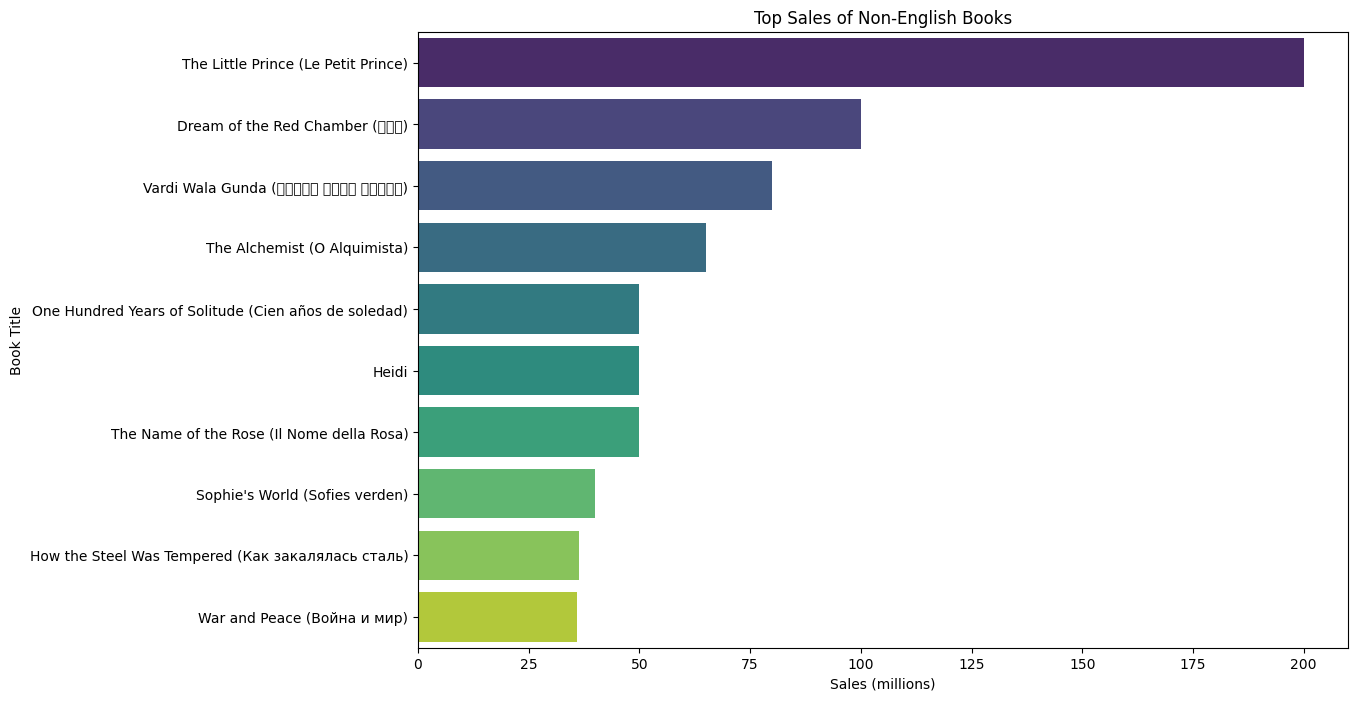

In [181]:
non_english_books = df[df["Original language"] != "English"]
top_non_english_books = non_english_books.sort_values('Approximate sales in millions', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_non_english_books, x='Approximate sales in millions', y='Book', palette='viridis')
plt.xlabel('Sales (millions)')
plt.ylabel('Book Title')
plt.title('Top Sales of Non-English Books')
plt.show()

In [182]:
# Best-Selling English Books

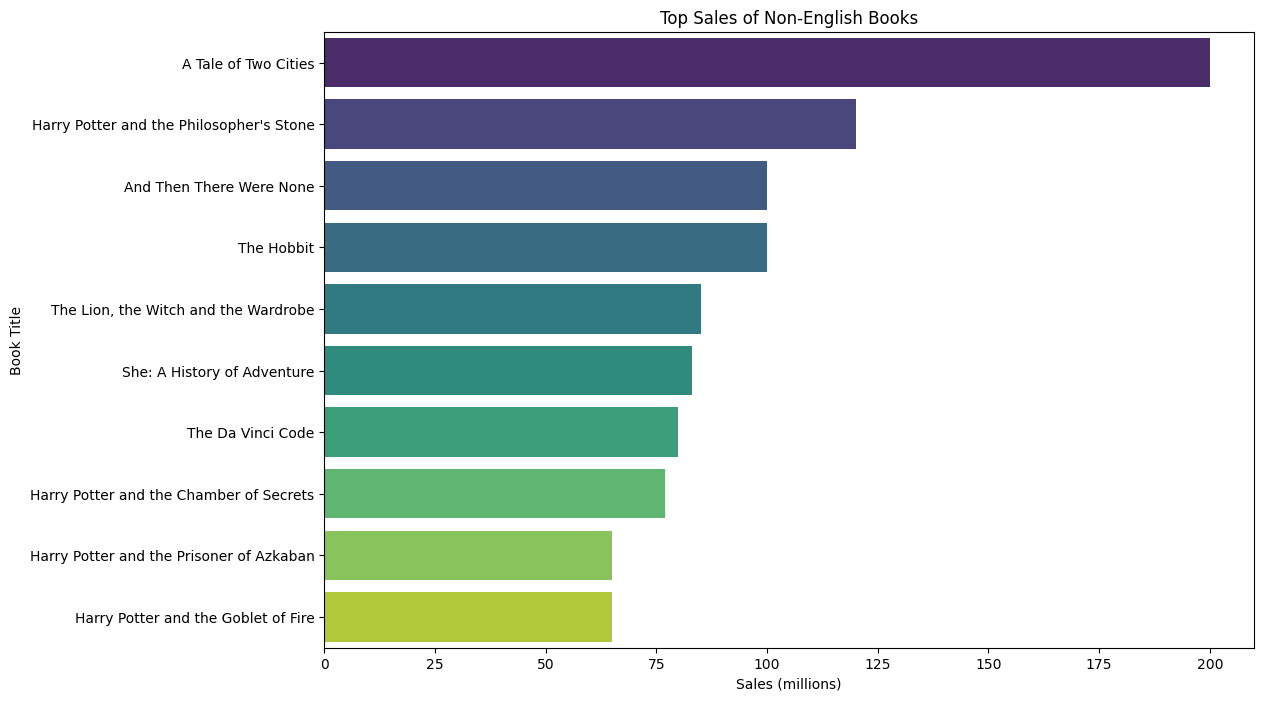

In [183]:
non_english_books = df[df["Original language"] == "English"]
top_non_english_books = non_english_books.sort_values('Approximate sales in millions', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_non_english_books, x='Approximate sales in millions', y='Book', palette='viridis')
plt.xlabel('Sales (millions)')
plt.ylabel('Book Title')
plt.title('Top Sales of Non-English Books')
plt.show()

In [184]:
# Revenue Trends Over Time

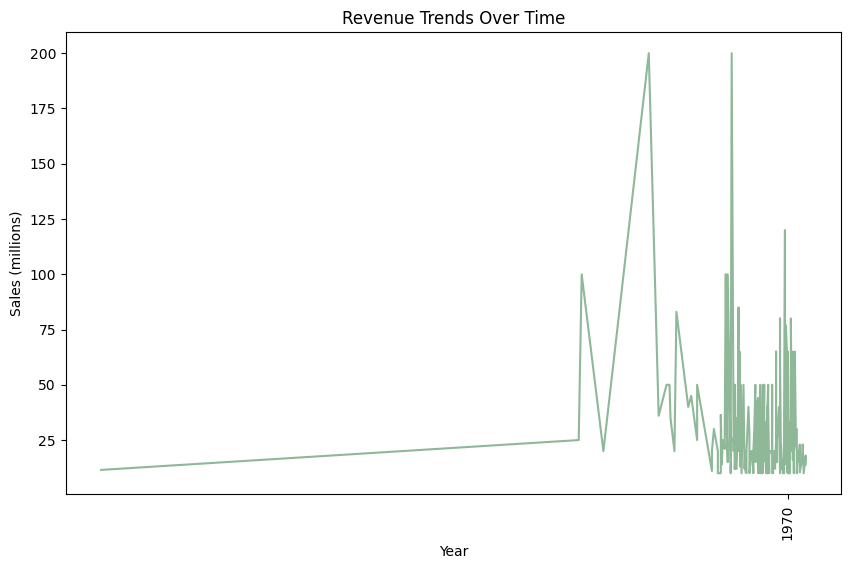

In [185]:
df['First published'] = pd.to_datetime(df['First published'])
df = df.sort_values('First published')
plt.figure(figsize=(10, 6))
plt.plot(df['First published'], df['Approximate sales in millions'], color= '#8EB897')
plt.xlabel('Year')
plt.ylabel('Sales (millions)')
plt.title('Revenue Trends Over Time')
plt.xticks(rotation=90)
plt.show()


In [186]:
# Ratio of Best-Selling English Books / Non-English Books vs. All Best-Selling Books

In [187]:
best_selling_books = df.sort_values('Approximate sales in millions', ascending=False).head(10)

english_best_selling_books = best_selling_books[best_selling_books['Original language'] == 'English']
non_english_best_selling_books = best_selling_books[best_selling_books['Original language'] != 'English']

ratio_english_to_total = len(english_best_selling_books) / len(best_selling_books)
ratio_non_english_to_total = len(non_english_best_selling_books) / len(best_selling_books)

print(f"Ratio of best-selling English books to all best-selling books: {ratio_english_to_total:.2%}")
print(f"Ratio of best-selling non-English books to all best-selling books: {ratio_non_english_to_total:.2%}")


Ratio of best-selling English books to all best-selling books: 70.00%
Ratio of best-selling non-English books to all best-selling books: 30.00%


In [188]:
# Authors with the Highest Sales

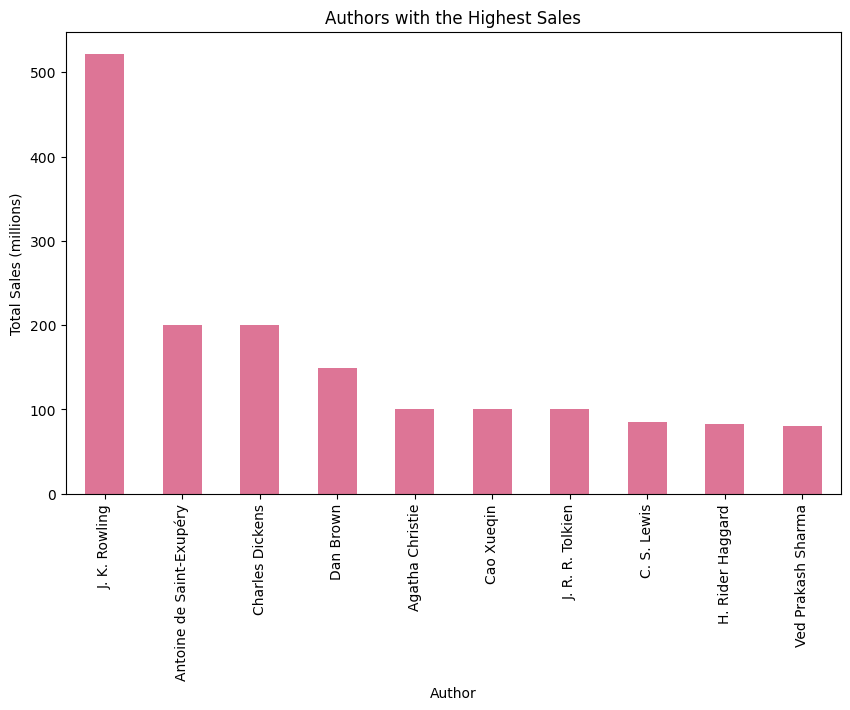

In [189]:
top_authors = df.groupby('Author(s)')['Approximate sales in millions'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_authors.plot(kind='bar', color='#DD7596')
plt.xlabel('Author')
plt.ylabel('Total Sales (millions)')
plt.title('Authors with the Highest Sales')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Sales Over the Years

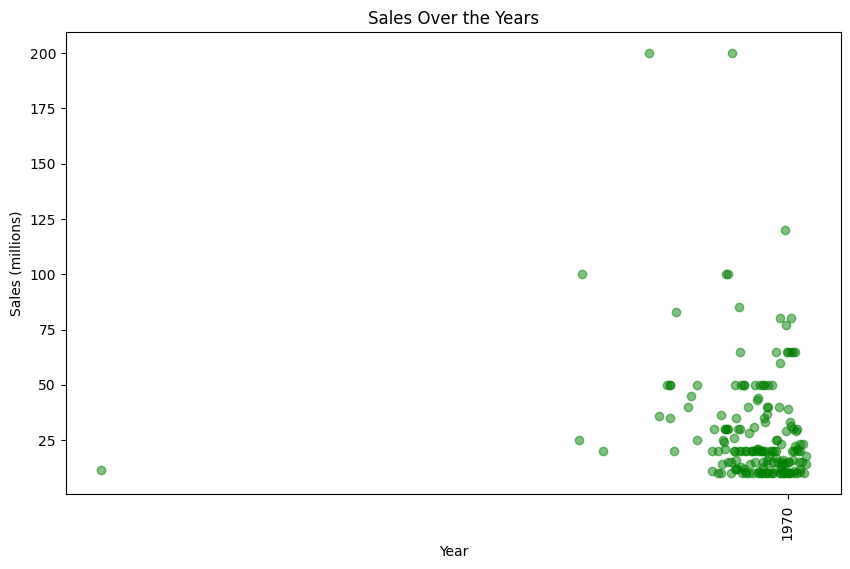

In [190]:
plt.figure(figsize=(10, 6))
plt.scatter(df['First published'], df['Approximate sales in millions'], alpha=0.5, color='green')
plt.xlabel('Year')
plt.ylabel('Sales (millions)')
plt.title('Sales Over the Years')
plt.xticks(rotation=90)
plt.show()

In [191]:
# Distribution of Sales By Language of Origin

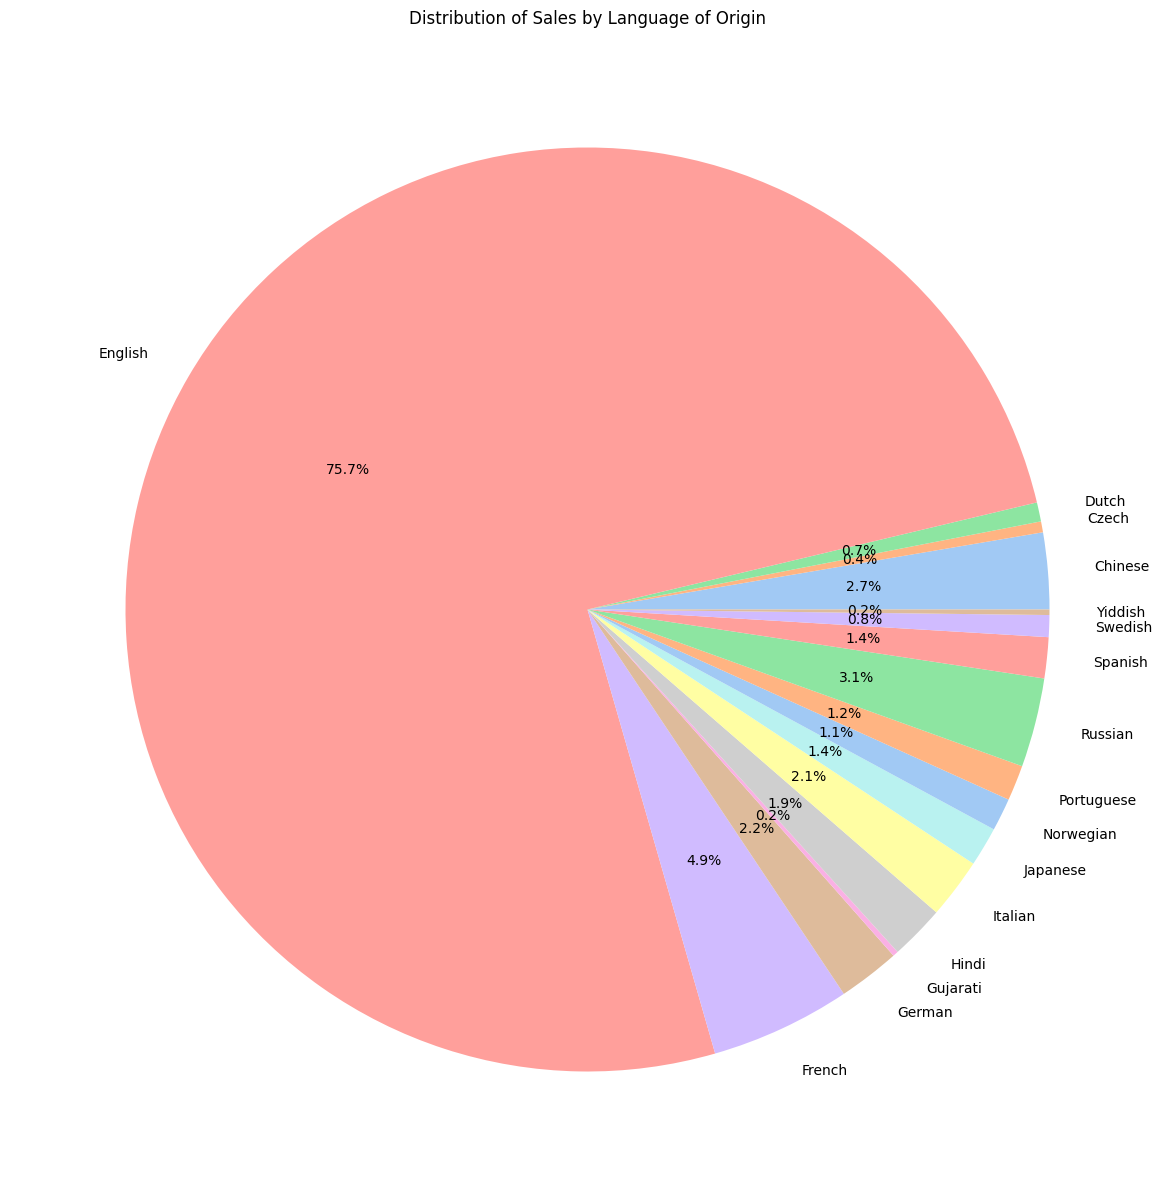

In [192]:
sales_by_language = df.groupby('Original language')['Approximate sales in millions'].sum().reset_index()
colors = sns.color_palette('pastel')[0:len(sales_by_language)]

plt.figure(figsize=(20, 15))
plt.pie(
    sales_by_language['Approximate sales in millions'],
    labels=sales_by_language['Original language'],
    autopct='%1.1f%%',
    colors=colors)
plt.title('Distribution of Sales by Language of Origin')
plt.show()